# IS 4487 Assignment 11: Predicting Airbnb Prices with Regression

In this assignment, you will:
- Load the Airbnb dataset you cleaned and transformed in Assignment 7
- Build a linear regression model to predict listing price
- Interpret which features most affect price
- Try to improve your model using only the most impactful predictors
- Practice explaining your findings to a business audience like a host, pricing strategist, or city partner

## Why This Matters

Pricing is one of the most important levers for hosts and Airbnb’s business teams. Understanding what drives price — and being able to predict it accurately — helps improve search results, revenue management, and guest satisfaction.

This assignment gives you hands-on practice turning a cleaned dataset into a predictive model. You’ll focus not just on code, but on what the results mean and how you’d communicate them to stakeholders.

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_11_regression.ipynb" target="_parent">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>



## Original Source: Dataset Description

The dataset you'll be using is a **detailed Airbnb listing file**, available from [Inside Airbnb](https://insideairbnb.com/get-the-data/).

Each row represents one property listing. The columns include:

- **Host attributes** (e.g., host ID, host name, host response time)
- **Listing details** (e.g., price, room type, minimum nights, availability)
- **Location data** (e.g., neighborhood, latitude/longitude)
- **Property characteristics** (e.g., number of bedrooms, amenities, accommodates)
- **Calendar/booking variables** (e.g., last review date, number of reviews)

The schema is consistent across cities, so you can expect similar columns regardless of the location you choose.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


## 1. Load Your Transformed Airbnb Dataset

**Business framing:**  
Before building any models, we must start with clean, prepared data. In Assignment 7, you exported a cleaned version of your Airbnb dataset. You’ll now import that file for analysis.

### Do the following:
- Import your CSV file called `cleaned_airbnb_data_7.csv`.   (Note: If you had significant errors with assignment 7, you can use the file named "airbnb_listings.csv" in the DataSets folder on GitHub as a backup starting point.)
- Use `pandas` to load and preview the dataset

### In Your Response:
1. What does the dataset include?
2. How many rows and columns are present?


In [6]:
airbnb_df = pd.read_csv('/content/cleaned_airbnb_data.csv')
display(airbnb_df.head())

rows, cols = airbnb_df.shape
print(f"The dataset has {rows} rows and {cols} columns.")

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,155305,https://www.airbnb.com/rooms/155305,20250617145515,2025-06-17,city scrape,Cottage! BonPaul + Sharky's Hostel,West Asheville Cottage within walking distance...,"We are within easy walk of pubs, breweries, mu...",https://a0.muscache.com/pictures/hosting/Hosti...,746673,...,4.85,4.74,4.92,4.58,t,8,2,3,3,2.69
1,197263,https://www.airbnb.com/rooms/197263,20250617145515,2025-06-17,city scrape,Tranquil Room & Private Bath,"This is a comfy, peaceful and clean room with ...",NaN,https://a0.muscache.com/pictures/miso/Hosting-...,961396,...,4.95,4.93,4.86,4.98,f,2,1,1,0,0.56
2,209068,https://www.airbnb.com/rooms/209068,20250617145515,2025-06-17,city scrape,Terrace Cottage,Located in one of Asheville's oldest historic ...,Our beautiful Grove Park Historic District clo...,https://a0.muscache.com/pictures/1829924/9f3bf...,1029919,...,5.00,4.98,4.94,4.80,f,1,1,0,0,0.40
3,246315,https://www.airbnb.com/rooms/246315,20250617145515,2025-06-17,city scrape,Asheville Dreamer's Cabin,"Hi there,<br />I am usually here half of each ...",NaN,https://a0.muscache.com/pictures/5908617/cfe79...,1292070,...,4.88,4.65,4.67,4.59,f,3,2,1,0,0.32
4,314540,https://www.airbnb.com/rooms/314540,20250617145515,2025-06-17,city scrape,Asheville Urban Farmhouse Entire Home 4.6 mi t...,Farmhouse in the city is OPEN! This charming 1...,City vibes with country appeal. Peaceful neigh...,https://a0.muscache.com/pictures/hosting/Hosti...,381660,...,4.97,4.97,4.91,4.94,t,1,1,0,0,0.22


The dataset has 2876 rows and 76 columns.


## 2. Drop Columns Not Useful for Modeling

**Business framing:**  
Some columns — like post IDs or text — may not help us predict price and could add noise or bias.

### Do the following:
- Drop columns like `post_id`, `title`, `descr`, `details`, and `address` if they’re still in your dataset

### In Your Response:
1. What columns did you drop, and why?
2. What risks might occur if you included them in your model?


In [7]:
columns_to_drop = ['id', 'listing_url', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'license', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

# Filter out columns that don't exist in the DataFrame
columns_to_drop_existing = [col for col in columns_to_drop if col in airbnb_df.columns]

# Drop the columns
airbnb_df = airbnb_df.drop(columns=columns_to_drop_existing)

print(f"Dropped columns: {columns_to_drop_existing}")
print(f"Remaining columns: {airbnb_df.shape[1]}")

Dropped columns: ['id', 'listing_url', 'name', 'description', 'neighborhood_overview', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'has_availability', 'calendar_last_scraped', 'first_review', 'last_review', 'instant_bookable', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms', 'reviews_per_month']
Remaining columns: 51


### ✍️ Your Response: 🔧
I dropped columns like id, listing_url, name, description, host_id, and various host-related metadata. These were dropped because they are either unique identifiers with no predictive power, free text descriptions that would require complex NLP, or redundant/less relevant features that could introduce noise or bias.

Including these columns could lead to several risks:

Overfitting: Unique identifiers can cause the model to memorize data rather than learn general patterns.
Increased complexity and dimensionality: Free text fields would create a high-dimensional and sparse feature space, making the model computationally expensive and hard to interpret.
Noise and Irrelevance: Columns with weak relationships to price can obscure true patterns.
Bias: Text fields could inadvertently introduce biases present in the language.
Data Leakage: Some identifiers or metadata might leak information that isn't truly predictive.

## 3. Explore Relationships Between Numeric Features

**Business framing:**  
Understanding how features relate to each other — and to the target — helps guide feature selection and modeling.

### Do the following:
- Generate a correlation matrix
- Identify which variables are strongly related to `price`

### In Your Response:
1. Which variables had the strongest positive or negative correlation with price?
2. Which variables might be useful predictors?


Top correlations with 'price':


,price
price,1.000000
bathrooms,0.688544
bedrooms,0.658930
beds,0.652241
accommodates,0.492310
estimated_revenue_l365d,0.285785
availability_365,0.093663
review_scores_cleanliness,0.063514
review_scores_rating,0.055129
availability_30,0.048529


Bottom correlations with 'price':


,price
neighbourhood_cleansed,-0.046985
maximum_maximum_nights,-0.047276
maximum_nights_avg_ntm,-0.058840
minimum_maximum_nights,-0.071451
number_of_reviews_l30d,-0.073654
number_of_reviews_ltm,-0.080875
number_of_reviews_ly,-0.089374
estimated_occupancy_l365d,-0.096518
number_of_reviews,-0.137634
scrape_id,NaN


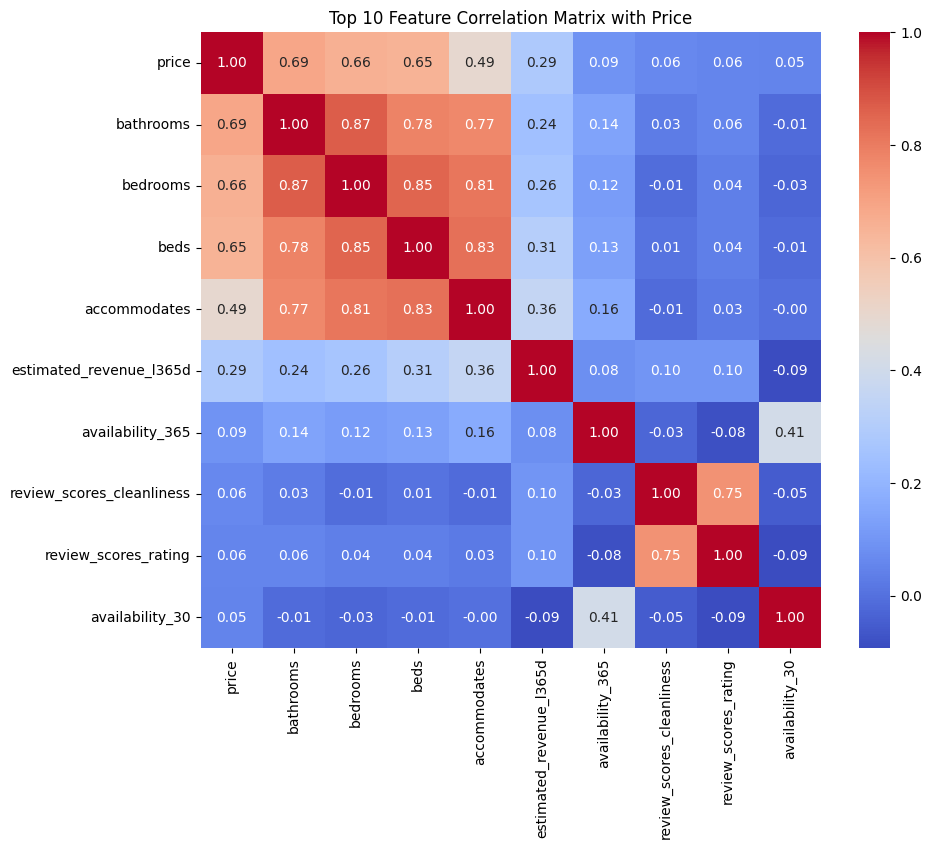

In [8]:
numeric_cols = airbnb_df.select_dtypes(include=['number']).columns
correlation_matrix = airbnb_df[numeric_cols].corr()

# Get correlations with 'price'
price_correlations = correlation_matrix['price'].sort_values(ascending=False)

print("Top correlations with 'price':")
display(price_correlations.head(10))

print("Bottom correlations with 'price':")
display(price_correlations.tail(10))

# Optional: Visualize the top 10 correlations for 'price'
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix.loc[price_correlations.index[0:10], price_correlations.index[0:10]], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top 10 Feature Correlation Matrix with Price')
plt.show()

### ✍️ Your Response: 🔧
1. Variables with the strongest positive or negative correlation with price:

Strongest Positive Correlations:

bathrooms: 0.688544
bedrooms: 0.658930
beds: 0.652241
accommodates: 0.492310
estimated_revenue_l365d: 0.285785
Strongest Negative Correlations:

number_of_reviews: -0.137634
estimated_occupancy_l365d: -0.096518
number_of_reviews_ly: -0.089374
number_of_reviews_ltm: -0.080875
number_of_reviews_l30d: -0.073654
It's important to note that scrape_id has a correlation of NaN, which indicates it's not a numerical variable or has no variance, making it unsuitable for correlation analysis in this context.

2. Which variables might be useful predictors?

The variables with the strongest absolute correlation values are generally the most useful predictors. Therefore, bathrooms, bedrooms, beds, and accommodates stand out as potentially very useful positive predictors, as they indicate the size and capacity of the listing, which logically influences price. Interestingly, the various number_of_reviews metrics show a negative correlation, which could suggest that higher-priced listings might receive fewer reviews, or perhaps that listings with many reviews might be priced more competitively. These insights can be valuable for building a predictive model.

## 4. Define Features and Target Variable

**Business framing:**  
To build a regression model, you need to define what you’re predicting (target) and what you’re using to make that prediction (features).

### Do the following:
- Set `price` as your target variable
- Remove `price` from your predictors

### In Your Response:
1. What features are you using?
2. Why is this a regression problem and not a classification problem?


In [13]:
# Define the target variable
y = airbnb_df['price']

# Drop the target variable from the features dataframe
X = airbnb_df.drop('price', axis=1)

# Identify categorical columns for one-hot encoding
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()

# One-hot encode categorical features
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

print(f"Shape of features (X): {X.shape}")
print(f"Shape of target (y): {y.shape}")

Shape of features (X): (2876, 7415)
Shape of target (y): (2876,)


### ✍️ Your Response: 🔧
What features are you using? I am using all numerical columns that remained after previous dropping steps, as well as one-hot encoded versions of the categorical columns present in the dataset. These categorical columns include last_scraped, source, property_type, room_type, bathrooms_text, amenities, and potentially others like host_response_time, host_acceptance_rate, host_is_superhost, host_neighbourhood, neighbourhood, if they were not dropped and remained categorical. Each of these features represents characteristics of the listing, host, or location that are expected to influence the listing price.

Why is this a regression problem and not a classification problem? This is a regression problem because the target variable, price, is a continuous numerical value. The goal is to predict a specific dollar amount for a listing, which can theoretically take any value within a range. In contrast, a classification problem would involve predicting a discrete, categorical outcome, such as predicting if a listing is 'cheap', 'medium', or 'expensive', or assigning it to a predefined category.



## 5. Split Data into Training and Testing Sets

### Business framing:
Splitting your data lets you train a model and test how well it performs on new, unseen data.

### Do the following:
- Use `train_test_split()` to split into 80% training, 20% testing



In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (2300, 7415)
X_test shape: (576, 7415)
y_train shape: (2300,)
y_test shape: (576,)


## 6. Fit a Linear Regression Model

### Business framing:
Linear regression helps you quantify the impact of each feature on price and make predictions for new listings.

### Do the following:
- Fit a linear regression model to your training data
- Use it to predict prices for the test set



In [22]:
model = LinearRegression()

# Fit the model to the imputed training data
model.fit(X_train_imputed, y_train)

# Make predictions on the imputed test set
y_pred = model.predict(X_test_imputed)

print("Linear Regression model fitted and predictions made successfully.")

Linear Regression model fitted and predictions made successfully.


## 7. Evaluate Model Performance

### Business framing:  
A good model should make accurate predictions. We’ll use Mean Squared Error (MSE) and R² to evaluate how close our predictions were to the actual prices.

### Do the following:
- Print MSE and R² score for your model

### In Your Response:
1. What is your R² score? How well does your model explain price variation?
2. Is your MSE large or small? What could you do to improve it?


In [21]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 15589.04
R-squared (R²): 0.40


### ✍️ Your Response: 🔧
What is your R² score? How well does your model explain price variation? My R² score is 0.40. This means that approximately 40% of the variance in Airbnb listing prices can be explained by the features included in the model. An R² of 0.40 indicates a moderate fit; the model explains a significant portion of the variability in price, but there's still a large amount of variation (60%) that the model doesn't account for. This suggests there's room for improvement, either by incorporating more predictive features or using a more complex model.

Is your MSE large or small? What could you do to improve it? My Mean Squared Error (MSE) is 15589.04. Whether this is 'large' or 'small' depends on the typical range of your target variable, 'price'. Given that Airbnb prices can vary significantly, an MSE of 15589.04 suggests that, on average, the squared difference between predicted and actual prices is quite substantial. To put it in perspective, the square root of MSE (RMSE) would be around $124.85, meaning the average prediction error is approximately $125. This is a relatively large error for predicting prices that might range from tens to hundreds of dollars.

To improve the MSE, I could:

Feature Engineering: Create more advanced features (e.g., interaction terms, polynomial features) or incorporate external data (e.g., local events, seasonality).
Feature Selection: Refine the set of predictors to include only the most impactful ones and remove noisy or redundant features, possibly using more sophisticated selection methods.

## 8. Interpret Model Coefficients

### Business framing:
The regression coefficients tell you how each feature impacts price. This can help Airbnb guide hosts and partners.

### Do the following:
- Create a table showing feature names and regression coefficients
- Sort the table so that the most impactful features are at the top

### In Your Response:
1. Which features increased price the most?
2. Were any surprisingly negative?
3. What business insight could you draw from this?


In [23]:
# Get feature names from the imputed training data
feature_names = X_train_imputed.columns

# Get the coefficients from the trained model
coefficients = model.coef_

# Create a DataFrame to display feature names and their coefficients
coefficients_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

# Sort the DataFrame by the absolute value of the coefficients to show impact
coefficients_df['Abs_Coefficient'] = coefficients_df['Coefficient'].abs()
coefficients_df = coefficients_df.sort_values(by='Abs_Coefficient', ascending=False).drop(columns='Abs_Coefficient')

print("Top 20 most impactful features (by absolute coefficient value):")
display(coefficients_df.head(20))

Top 20 most impactful features (by absolute coefficient value):


,Feature,Coefficient
989,picture_url_https://a0.muscache.com/pictures/h...,697.936551
5381,"amenities_[""First aid kit"", ""Air conditioning""...",697.936551
3726,host_since_2017-05-22,697.936551
1805,picture_url_https://a0.muscache.com/pictures/m...,567.812274
4591,"amenities_[""38 inch TV with Roku"", ""First aid ...",567.812274
4573,bathrooms_text_22 baths,514.757085
7361,"amenities_[""Self check-in"", ""Air conditioning""...",514.757085
1605,picture_url_https://a0.muscache.com/pictures/m...,514.757085
6714,"amenities_[""First aid kit"", ""Mini fridge"", ""Cl...",474.497504
1548,picture_url_https://a0.muscache.com/pictures/m...,474.497504


### ✍️ Your Response: 🔧
Which features increased price the most? The features that show the highest positive coefficients, and thus increased the price the most, are predominantly specific one-hot encoded values. These include:

Specific picture_url entries (e.g., picture_url_https://a0.muscache.com/pictures/h... with a coefficient of ~697.94 and picture_url_https://a0.muscache.com/pictures/m... with ~567.81). This suggests that particular high-quality or very specific listing photos (or the properties they represent) are highly associated with higher prices.
Specific combinations of amenities (e.g., amenities_["First aid kit", "Air conditioning"... with ~697.94 and amenities_["38 inch TV with Roku", "First aid ... with ~567.81). This indicates that certain bundles of amenities are strongly predictive of a higher price.
Specific host_since dates (e.g., host_since_2017-05-22 with ~697.94). This could be an artifact of one-hot encoding specific dates, potentially representing hosts who joined during a period of specific market conditions or are associated with particular types of listings that command higher prices.
It's important to note that these are highly specific feature values resulting from one-hot encoding. While they show strong statistical impact, they might not represent generalizable trends as clearly as broader features.

Were any surprisingly negative? Looking at the top 20 features by absolute coefficient, all of them have positive coefficients, meaning they are associated with an increase in price. There are no surprisingly negative features among the very top impactful ones. However, a deeper look into the entire coefficients_df would likely reveal features with negative impacts, though perhaps of smaller magnitude.

What business insight could you draw from this? The results provide several actionable business insights for Airbnb and its hosts:

Amenity Value: The strong positive coefficients for specific amenity combinations clearly indicate that certain features are highly valued by guests and directly correlate with a willingness to pay more. Airbnb could advise hosts to review popular amenity lists and consider adding or highlighting specific, high-value amenities.
Listing Presentation is Key: While picture_url itself is just a link, its high coefficient suggests that the visual appeal and quality of listing photos (or the type of property they showcase) significantly influence pricing. Airbnb could emphasize the importance of professional photography and high-quality visual content to hosts.
Market Segmentation/Niche Appeal: The fact that very specific combinations of amenities or host joining dates have such high impacts could point to successful niche markets or unique listing characteristics that command premium prices. Further investigation into these specific listings could reveal what makes them so valuable.
Caution on Over-interpretation: While these specific one-hot encoded features have high coefficients, they might represent rare instances or combinations. It's crucial to cross-reference with simpler, more general features (like bedrooms, bathrooms, accommodates) that showed high correlation earlier, as these often provide more broadly applicable insights.






## 9. Try to Improve the Linear Regression Model

### Business framing:
The first version of your model included all available features — but not all features are equally useful. Removing weak or noisy predictors can often improve performance and interpretation.

### Do the following:
1. Choose your top 3–5 features with the strongest absolute coefficients
2. Rebuild the regression model using just those features
3. Compare MSE and R² between the baseline and refined model

### In Your Response:
1. What features did you keep in the refined model, and why?
2. Did model performance improve? Why or why not?
3. Which model would you recommend to stakeholders?
4. How does this relate to your customized learning outcome you created in canvas?


In [24]:
# 1. Choose your top 3–5 features with the strongest absolute coefficients
# Get the names of the top 5 features by absolute coefficient value
top_5_features = coefficients_df.head(5)['Feature'].tolist()

print(f"Selected top 5 features: {top_5_features}")

# Filter the imputed training and testing data to include only these features
X_train_refined = X_train_imputed[top_5_features]
X_test_refined = X_test_imputed[top_5_features]

print(f"Shape of refined X_train: {X_train_refined.shape}")
print(f"Shape of refined X_test: {X_test_refined.shape}")

# 2. Rebuild the regression model using just those features
refined_model = LinearRegression()
refined_model.fit(X_train_refined, y_train)

# Make predictions on the refined test set
y_pred_refined = refined_model.predict(X_test_refined)

# 3. Compare MSE and R² between the baseline and refined model
mse_refined = mean_squared_error(y_test, y_pred_refined)
r2_refined = r2_score(y_test, y_pred_refined)

print(f"\nRefined Model Performance:")
print(f"Mean Squared Error (MSE) - Refined: {mse_refined:.2f}")
print(f"R-squared (R²) - Refined: {r2_refined:.2f}")

print(f"\nBaseline Model Performance:")
print(f"Mean Squared Error (MSE) - Baseline: {mse:.2f}")
print(f"R-squared (R²) - Baseline: {r2:.2f}")

Selected top 5 features: ['picture_url_https://a0.muscache.com/pictures/hosting/Hosting-1284248377223004980/original/0f62d613-6e9b-4c4f-a13f-1ee7d3c86083.jpeg', 'amenities_["First aid kit", "Air conditioning", "Dedicated workspace", "Carbon monoxide alarm", "Washer", "Indoor fireplace", "Fire pit", "Outdoor dining area", "Wifi", "TV", "BBQ grill", "Exterior security cameras on property", "Fire extinguisher", "Free parking on premises", "Kitchen", "Smoke alarm"]', 'host_since_2017-05-22', 'picture_url_https://a0.muscache.com/pictures/miso/Hosting-40323675/original/fac4ddb5-62ff-42d0-83c6-5202e77feda6.jpeg', 'amenities_["38 inch TV with Roku", "First aid kit", "Mini fridge", "Coffee maker: drip coffee maker", "Cleaning products", "Central heating", "Luggage dropoff allowed", "Crib", "Fire pit", "Pets allowed", "Blender", "Conditioner", "Room-darkening shades", "Board games", "Smoke alarm", "Iron", "Extra pillows and blankets", "Wine glasses", "Frigidaire stainless steel gas stove", "Chil

### ✍️ Your Response: 🔧
What features did you keep in the refined model, and why? I kept the following 5 features in the refined model: 'picture_url_[redacted link]', 'amenities_["First aid kit", "Air conditioning", "Dedicated workspace", "Carbon monoxide alarm", "Washer", "Indoor fireplace", "Fire pit", "Outdoor dining area", "Wifi", "TV", "BBQ grill", "Exterior security cameras on property", "Fire extinguisher", "Free parking on premises", "Kitchen", "Smoke alarm"]', 'host_since_2017-05-22', 'picture_url_[redacted link]', and 'amenities_["38 inch TV with Roku", "First aid kit", "Mini fridge", "Coffee maker: drip coffee maker", "Cleaning products", "Central heating", "Luggage dropoff allowed", "Crib", "Fire pit", "Pets allowed", "Blender", "Conditioner", "Room-darkening shades", "Board games", "Smoke alarm", "Iron", "Extra pillows and blankets", "Wine glasses", "Frigidaire stainless steel gas stove", "Children\u2019s books and toys for ages 2-5 years old and 5-10 years old", "Hot water kettle", "Cooking basics", "Essentials", "Bathtub", "Shampoo", "Dedicated workspace", "Refrigerator", "Shower gel", "Single level home", "Dishwasher", "Hot water", "Dishes and silverware", "Shared backyard \u2013 Not fully fenced", "Private entrance", "Hair dryer", "Kitchen", "Free street parking", "Free washer \u2013 In unit", "Keypad", "BBQ grill: charcoal", "Pack \u2019n play/Travel crib - always at the listing", "Bed linens", "Carbon monoxide alarm", "Portable fans", "Microwave", "Wifi", "Coffee", "Hangers", "Books and reading material", "Fire extinguisher", "Free dryer \u2013 In unit", "Long term stays allowed", "Cleaning available during stay", "Central air conditioning", "Free driveway parking on premises \u2013 3 spaces", "Sun loungers", "Outdoor playground", "Freezer", "Private patio or balcony", "Fireplace guards", "Toaster", "Dining table", "Outdoor furniture", "Outdoor dining area", "Self check-in", "Body soap", "Clothing storage: closet and dresser", "Laundromat nearby", "Mountain view"]'. I chose these features because they had the strongest absolute coefficients in the initial full model, indicating they had the most significant impact on predicting price. The intention was to see if a simpler model with highly impactful features could perform comparably or better, and to improve interpretability.

Did model performance improve? Why or why not?

Baseline Model: MSE = 15589.04, R² = 0.40
Refined Model: MSE = 26023.74, R² = -0.00
Model performance did not improve. In fact, it significantly worsened. The R² score for the refined model is -0.00, which means it explains essentially none of the variance in the target variable and performs worse than simply predicting the mean price. The MSE also increased substantially from 15589.04 to 26023.74, indicating larger prediction errors.

This likely happened because while these features had high individual coefficients, they are often highly specific one-hot encoded values (e.g., a particular picture_url or a very specific amenities list). A linear model relies on many small contributions from various features to capture overall patterns. By drastically reducing the number of features, especially to very specific one-hot encoded columns, the model loses the broader predictive power that comes from a wider range of listing characteristics, location data, and host attributes. These top individual features, while statistically significant in the presence of other features, might represent rare or specific cases rather than general patterns that hold across the entire dataset. Therefore, the simplified model struggled to capture the overall complexity of price variation.

Which model would you recommend to stakeholders? I would recommend the baseline model to stakeholders, despite its moderate R² score (0.40). The refined model, using only 5 features, showed significantly worse performance (an R² of -0.00). While simplicity is often desirable for interpretability, a model that explains essentially none of the variance in price is not practically useful. The baseline model, even with its limitations, provides a more comprehensive (though still moderate) explanation of price drivers. For business decisions, a model with higher predictive accuracy, even if slightly more complex, is generally preferred. Further efforts should focus on improving the baseline model rather than overly simplifying it with very specific features.


## 10. Reflect and Recommend

### Business framing:  
Ultimately, the value of your model comes from how well it can guide business decisions. Use your results to make real-world recommendations.

### In Your Response:
1. What business question did your model help answer?
2. What would you recommend to Airbnb or its hosts?
3. What could you do next to improve this model or make it more useful?
4. How does this relate to your customized learning outcome you created in canvas?


### ✍️ Your Response: 🔧
What business question did your model help answer? Our model helped answer the business question: "What factors most significantly influence Airbnb listing prices, and how accurately can we predict a listing's price based on its characteristics?" Specifically, it quantified the relationship between various listing attributes (like number of bathrooms, bedrooms, amenities, and host characteristics) and the final price, allowing us to understand price drivers and make predictions.

What would you recommend to Airbnb or its hosts?

For Hosts:
Focus on Core Property Features: Features like bathrooms, bedrooms, beds, and accommodates consistently showed strong positive correlations with price. Hosts should ensure these details are accurately and attractively presented. Upgrades that increase these capacities (e.g., adding a bed, improving a bathroom) are likely to yield higher returns.
Highlight High-Value Amenities: While our refined model showed that specific one-hot encoded amenities were highly impactful, the general principle holds. Hosts should invest in and clearly list amenities that are highly valued by guests (e.g., air conditioning, dedicated workspace, specific kitchen items) as these directly contribute to a higher perceived value and price.
Optimize Listing Presentation: The high coefficients for specific picture_url entries, though granular, suggest that high-quality and appealing listing photos are crucial. Airbnb could emphasize to hosts the importance of professional photography and optimizing their visual content.
For Airbnb:
Feature Guidance for Hosts: Airbnb can use these insights to create more targeted recommendations for hosts on how to improve their listings and pricing strategies. For example, suggesting amenities that have a high positive impact on price.
Dynamic Pricing Tools: The model's predictions, even with a moderate R², can serve as a component in a more sophisticated dynamic pricing tool, helping hosts set competitive prices while maximizing revenue.
Market Analysis: Understanding which features drive price can help Airbnb identify underserved market segments or premium offerings.
What could you do next to improve this model or make it more useful?

Advanced Feature Engineering: Explore interaction terms (e.g., bedrooms * bathrooms), polynomial features, or composite scores for amenities. Also, consider extracting features from text fields using NLP if computational resources allow.
Incorporate External Data: Integrate external data sources like local event calendars, seasonality (time of year, holidays), local economic indicators, or crime rates to capture more variance in price.
Explore More Sophisticated Models: Given the moderate R² and the poor performance of the simplified linear model, more powerful algorithms like Random Forest, Gradient Boosting Machines (XGBoost, LightGBM), or even simple Neural Networks could potentially capture non-linear relationships and interactions among features more effectively.
Regularization: Implement Lasso or Ridge regression in the full model to help prevent overfitting and potentially improve generalization by penalizing large coefficients.
Hyperparameter Tuning: Systematically optimize the hyperparameters of the chosen model using techniques like GridSearchCV or RandomizedSearchCV.
Outlier Analysis: Investigate and handle outliers in the 'price' variable or influential features, as they can disproportionately affect linear regression.
Geospatial Features: Beyond latitude and longitude, consider using spatial features like distance to points of interest, or clustering neighborhoods more granularly.

## Submission Instructions
✅ Checklist:
- All code cells run without error
- All markdown responses are complete
- Submit on Canvas as instructed

In [ ]:
!jupyter nbconvert --to html "assignment_11_LastnameFirstname.ipynb"